In [110]:
import os
import json
import random 
import numpy as np
import numpy.ma as ma
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

In [113]:
def load_baglsfolder():
    """Function to return the list with all files inside the directory"""
    BAGLS_PATH = r"""Mini_BAGLS_dataset/"""
    files = os.listdir(BAGLS_PATH)
    return files

def file_seg(files):
    """Function to return segregate meta, masks, png filenames into separate lists"""
    meta = []
    png = []
    seg = []
    for file in files:
        if file[-4:] == 'meta':
            meta.append(file)
        elif file[-3:] == 'png':
            if file[-7:] == 'seg.png':
                seg.append(file)
            else:
                png.append(file)
        else:
            pass
    return meta, png, seg

def choose_random_png(png):
    """Function returns a random png image from the input list"""
    rand_png = random.choice(png)
    return rand_png

def retrieve_seg_meta(rand_png,seg,meta):
    """Function to return corresponding mask and meta data file names from source list"""
    for segfile in seg:
        if rand_png[0:rand_png.index('.')] == segfile[0:segfile.index('_')]:
            return_seg = segfile
    for metafile in meta:
        if rand_png[0:rand_png.index('.')] == metafile[0:metafile.index('.')]:
            return_meta = metafile
    return return_seg,return_meta

def load_png_file(file_name):
    """Function to load png file"""
    image = mpimg.imread(f"Mini_BAGLS_dataset/{file_name}")
    return image
def load_jpg_file(file_name):
    """Function to load png file"""
    image = mpimg.imread(f"{file_name}")
    return image
def load_meta_file(file_name):
    """Function to load metadata file"""
    file_path = f"Mini_BAGLS_dataset/{file_name}"
    with open(file_path,'r') as file:
        content = json.load(file)
        return content


In [ ]:
file_list = load_baglsfolder() #loads the list of files inside the directory
meta,png,seg = file_seg(file_list) #Splits the main list into three lists 
num_of_images = 4 #Number of files to load
chosen_images = {} #Empty dict to store info about to be loaded files
for i in range(num_of_images):
    """Function to create a dictionary containing png,mask,meta data"""
    rand_png = choose_random_png(png)
    rand_seg, rand_meta = retrieve_seg_meta(rand_png, seg, meta)
    chosen_images.update({i:{"png":rand_png,"seg":rand_seg,"meta":rand_meta}})

In [104]:
image_data_dict = {} 
for i in chosen_images:
    req_png = load_png_file(chosen_images[i]['png'])
    req_mask = load_png_file(chosen_images[i]['seg'])
    #req_meta = load_meta_file(chosen_images[i]['meta'])
    
    #Requried files are added to the image_data_dict for further processing in the below codes
    image_data_dict.update({i:{"req_png":req_png,"req_mask":req_mask,"req_meta":chosen_images[i]['meta']}})

In [ ]:
chosen_images

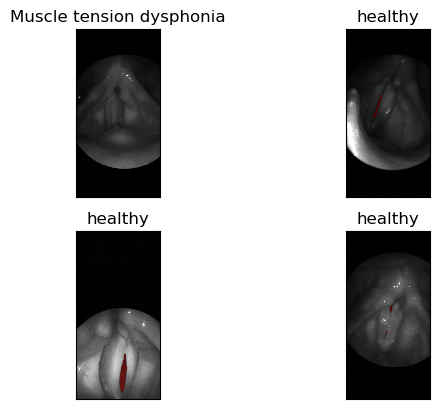

In [106]:
fig, ax = plt.subplots(nrows=2, ncols=2) #Currently works only for 4 files chosen
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
counter = 0
for row in ax:
    for col in row:
        image1 = image_data_dict[counter]['req_png']
        image2 = image_data_dict[counter]['req_mask']
        meta_data = load_meta_file(image_data_dict[counter]["req_meta"])
        if counter == 0:
            ax[0,0].imshow(image1, interpolation='None') 
            ax[0,0].imshow(image2, interpolation='None',cmap='jet', alpha=0.6*(image2>0))
            ax[0,0].set_title(meta_data["Subject disorder status"])
        elif counter == 1:
            ax[0,1].imshow(image1, interpolation='None') 
            ax[0,1].imshow(image2, interpolation='None',cmap='jet', alpha=0.6*(image2>0))
            ax[0,1].set_title(meta_data["Subject disorder status"])
        elif counter == 2:
            ax[1,0].imshow(image1, interpolation='None')
            ax[1,0].imshow(image2, interpolation='None',cmap='jet', alpha=0.6*(image2>0))
            ax[1,0].set_title(meta_data["Subject disorder status"])
        elif counter == 3:
            ax[1,1].imshow(image1, interpolation='None')
            ax[1,1].imshow(image2, interpolation='None',cmap='jet', alpha=0.6*(image2>0))
            ax[1,1].set_title(meta_data["Subject disorder status"])
        counter = counter + 1


In [115]:
leaves = load_jpg_file("leaves.jpg")

In [116]:
type(leaves)

numpy.ndarray